# **HUMAN ACTIVITY RECOGNITION USING SMARTPHONES**

## Importing packages needed

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Reading dataset and assigning names to columns

In [15]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.read_csv('C:/Users/jiten/Downloads/WISDM.txt', header=None, names = columns)

## Data Preprocessing

In [16]:
data = data.dropna()
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [17]:
data.tail()

,user,activity,time,x,y,z
1098199,19,Sitting,131623331483000,9.00,-1.57,1.69
1098200,19,Sitting,131623371431000,9.04,-1.46,1.73
1098201,19,Sitting,131623411592000,9.08,-1.38,1.69
1098202,19,Sitting,131623491487000,9.00,-1.46,1.73
1098203,19,Sitting,131623531465000,8.88,-1.33,1.61


In [18]:
data.shape

(1098203, 6)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1098203 non-null  int64  
 1   activity  1098203 non-null  object 
 2   time      1098203 non-null  int64  
 3   x         1098203 non-null  float64
 4   y         1098203 non-null  float64
 5   z         1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


In [20]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [21]:
data['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

### Ploting data according to activity for further understanding

In [22]:
Fs = 20

In [23]:
activities = data['activity'].value_counts().index

In [24]:
def plot_activity(activity,data):
  fig,(ax0,ax1,ax2) = plt.subplots(nrows=3, figsize=(15,7), sharex=True)
  plot_axis(ax0, data['time'],data['x'], 'X-Axis')
  plot_axis(ax1, data['time'],data['y'], 'Y-Axis')
  plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show()

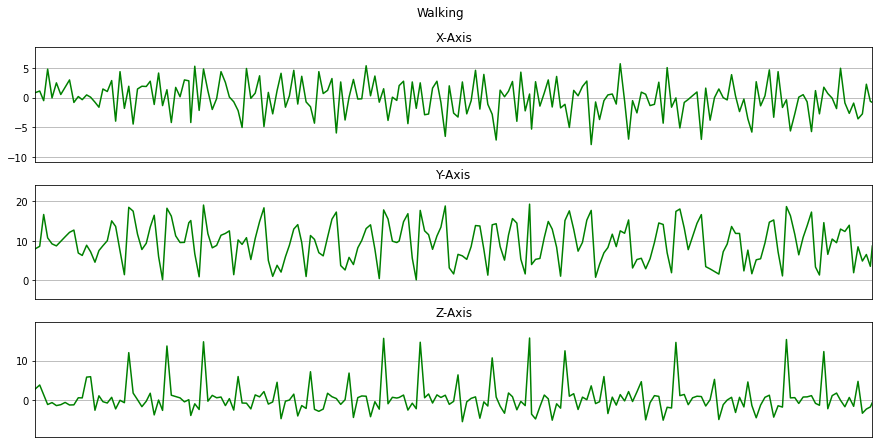

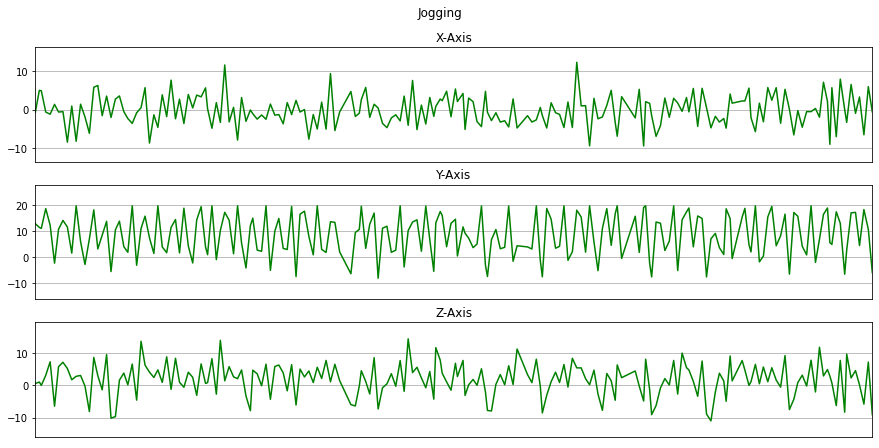

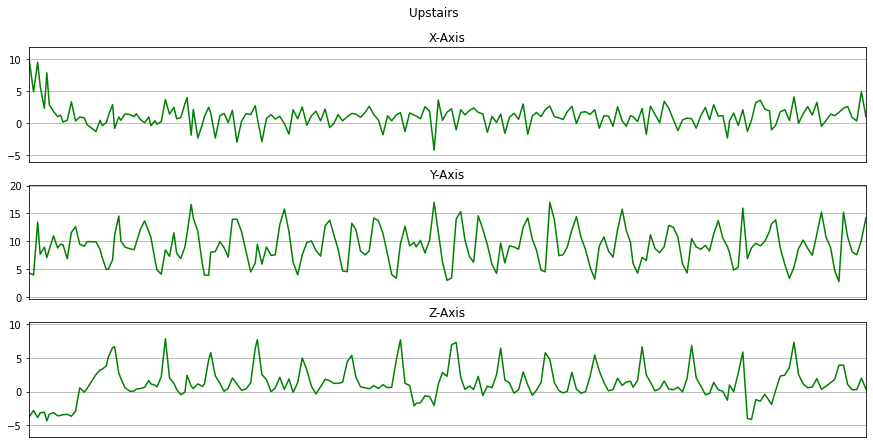

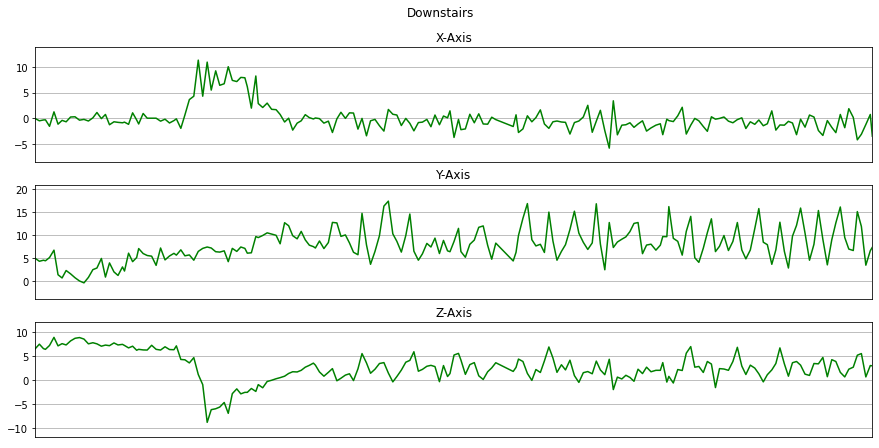

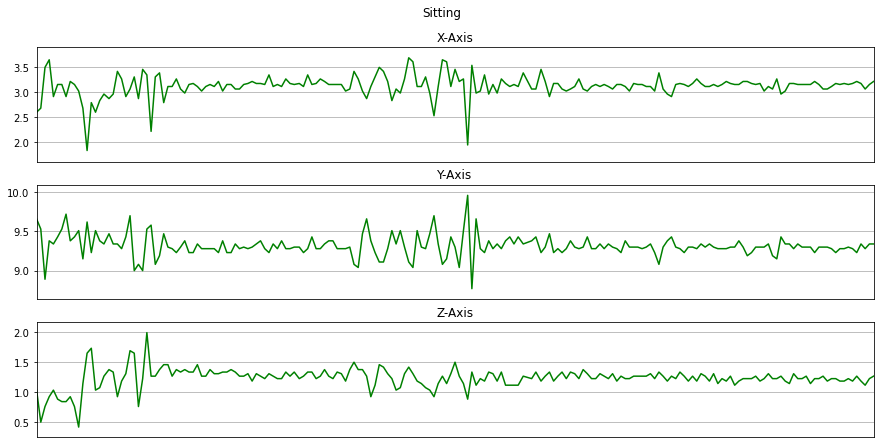

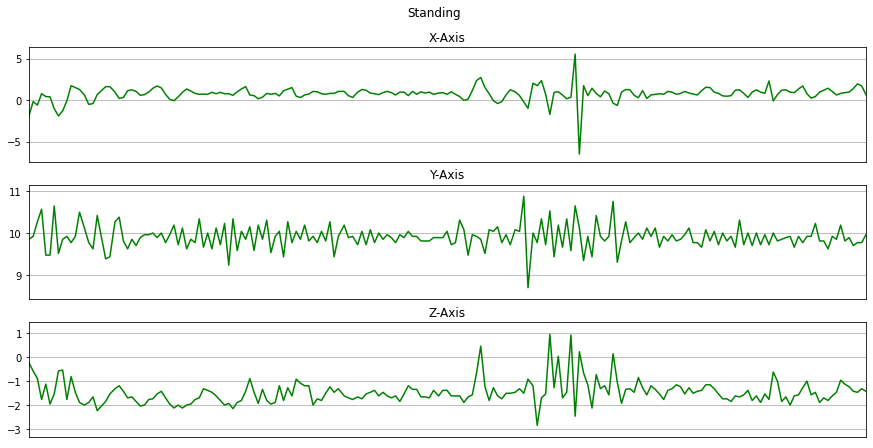

In [25]:
def plot_axis(ax,x,y,title):
  ax.plot(x, y, 'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot = data[(data['activity'] == activity)][:Fs*10]
  plot_activity(activity, data_for_plot)

### Dropping unnecessary columns

In [26]:
df = data.drop(['user','time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [27]:
df['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [28]:
Walking = df[df['activity']=='Walking'].head(48395).copy()
Jogging = df[df['activity']=='Jogging'].head(48395).copy()
Upstairs = df[df['activity']=='Upstairs'].head(48395).copy()
Downstairs = df[df['activity']=='Downstairs'].head(48395).copy()
Sitting = df[df['activity']=='Sitting'].head(48395).copy()
Standing = df[df['activity']=='Standing'].head(48395).copy()

### Creating a balanced dataset

In [29]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(290370, 4)

In [30]:
balanced_data['activity'].value_counts()

Jogging       48395
Sitting       48395
Upstairs      48395
Walking       48395
Downstairs    48395
Standing      48395
Name: activity, dtype: int64

In [31]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


### Importing label encoder and encoding according to its activity

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [34]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [35]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [36]:
scaler  = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x','y','z'])
scaled_X['label'] = y.values

In [37]:
scaled_X

,x,y,z,label
0,-0.034489,0.076967,0.266487,5
1,0.017285,0.187547,0.495750,5
2,-0.290769,1.637371,-0.075839,5
3,0.716230,0.573348,-0.650569,5
4,-0.202754,0.298127,-0.537507,5
...,...,...,...,...
290365,-1.143388,0.145748,-0.464958,3
290366,-1.169996,0.118686,-0.474181,3
290367,-1.061662,0.165594,-0.582554,3
290368,-1.046457,0.172811,-0.626365,3


### Importing SciPy stats for stastical analysis of encoded data

In [38]:
import scipy.stats as stats

In [39]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [40]:
def get_frames(df, frame_size, hop_size):
  N_FEATURES = 3

  frames = []
  labels  = []
  for i in range(0, len(df) - frame_size, hop_size):
      x = df['x'].values[i: i + frame_size]
      y = df['y'].values[i: i+ frame_size]
      z = df ['z'].values[i: i+frame_size]

      label = stats.mode(df['label'][i:i+frame_size])[0][0]
      frames.append([x,y,z])
      labels.append(label)

  frames = np.asarray(frames).reshape(-1, frame_size , N_FEATURES)
  label = np.asarray(labels)

  return frames,labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [42]:
np.shape(X)

(7258, 80, 3)

In [43]:
np.shape(y)

(7258,)

### Splitting data into test data and train data

In [44]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0, stratify = y)

In [45]:
x_train.shape , x_test.shape

((5806, 80, 3), (1452, 80, 3))

In [46]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [47]:
x_train = x_train.reshape(5806,80,3,1)
x_test = x_test.reshape(1452,80,3,1)

In [48]:
x_train[0].shape, x_test[0].shape

((80, 3, 1), (80, 3, 1))

In [49]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

## Training the model

### Setting model parameters

In [50]:
model = Sequential()
model.add(Conv2D(16,(2,2), activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

### Compilation and fitting model

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001),loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train, epochs = 10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
182/182 [==============================] - 2s 7ms/step - loss: 0.9000 - accuracy: 0.6385 - val_loss: 0.5477 - val_accuracy: 0.7713
Epoch 2/10
182/182 [==============================] - 1s 7ms/step - loss: 0.5721 - accuracy: 0.7601 - val_loss: 0.4640 - val_accuracy: 0.8113
Epoch 3/10
182/182 [==============================] - 1s 6ms/step - loss: 0.4966 - accuracy: 0.7947 - val_loss: 0.4112 - val_accuracy: 0.8457
Epoch 4/10
182/182 [==============================] - 1s 6ms/step - loss: 0.4295 - accuracy: 0.8250 - val_loss: 0.3707 - val_accuracy: 0.8574
Epoch 5/10
182/182 [==============================] - 1s 6ms/step - loss: 0.3730 - accuracy: 0.8465 - val_loss: 0.3213 - val_accuracy: 0.8919
Epoch 6/10
182/182 [==============================] - 1s 6ms/step - loss: 0.3252 - accuracy: 0.8688 - val_loss: 0.2895 - val_accuracy: 0.8994
Epoch 7/10
182/182 [==============================] - 1s 6ms/step - loss: 0.2955 - accuracy: 0.8862 - val_loss: 0.2578 - val_accuracy: 0.9118
Epoch 

## Plotting curves for model's learning history analysis

In [52]:
def plot_learningCurve(history,epochs):

  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss accuracy')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  

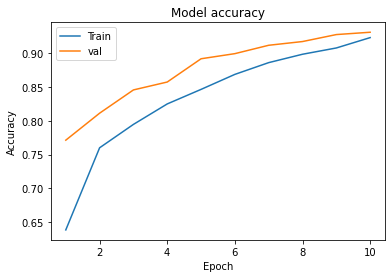

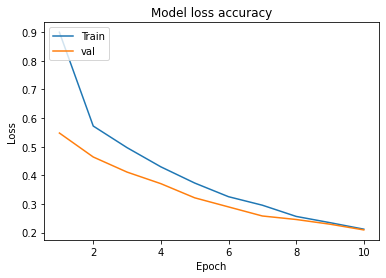

In [53]:
plot_learningCurve(history,10)